In [1]:
import pandas as pd
import numpy as np
import fsspec

import re
import nltk
from nltk.corpus import stopwords  
import textblob
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import gensim
from gensim.models import word2vec

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mahi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/mahi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
mx_hur = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2014_Hurricane_Odile_Mexico_en/2014_Hurricane_Odile_Mexico_en_CF_labeled_data.tsv', sep='\t', engine='python')
mx_hur.head()

,tweet_id,tweet_text,label
0,'511962276383825920',Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support
1,'511733855871438848',Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage
2,'511493520952393728',"Residents, Tourists Sent to Shelters as Hurric...",displaced_people_and_evacuations
3,'511547268701646848',Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support
4,'511710044044677121',Does anyone have information on emergency serv...,other_useful_information


In [4]:
ph_hur = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2014_Philippines_Typhoon_Hagupit_en/2014_Philippines_Typhoon_Hagupit_en_CF_labeled_data.tsv', sep='\t', engine='python')
ph_hur.head()

,tweet_id,tweet_text,label
0,'541357334178824192',Typhoon hits same place as last year (7000+ ki...,injured_or_dead_people
1,'541995520533999616',Typhoon Hagupit (Ruby) - Red Cross - Alive and...,missing_trapped_or_found_people
2,'541752063877599232',RT @CDSL_SAC: Metro Manila is now under Signal...,caution_and_advice
3,'542174862173691907',RT @uplbperspective: UPLB CURRENT CONDITIONS: ...,other_useful_information
4,'541829976341762048',#RubyPH let's pray. be safe,sympathy_and_emotional_support


In [5]:
pam_hur = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2015_Cyclone_Pam_en/2015_Cyclone_Pam_en_CF_labeled_data.tsv', sep='\t', engine='python')
pam_hur.head()

,tweet_id,tweet_text,label
0,'577768641065836544',RT @MailOnline: Cyclone Pam ravages Vanuatu as...,infrastructure_and_utilities_damage
1,'579096700037545984',"Over 166,000 people affected on #Vanuatu and n...",injured_or_dead_people
2,'580888918259863552',Relationship goal is jim and Pam the office se...,not_related_or_irrelevant
3,'576916057736138753',Like martin do pam bitch get out,not_related_or_irrelevant
4,'577376430180315136',"Send cash to UNICEF, Red Cross, relevant NGOs ...",donation_needs_or_offers_or_volunteering_services


In [6]:
eq_df = pd.concat([mx_hur, ph_hur, pam_hur], ignore_index=True)
eq_df

,tweet_id,tweet_text,label
0,'511962276383825920',Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support
1,'511733855871438848',Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage
2,'511493520952393728',"Residents, Tourists Sent to Shelters as Hurric...",displaced_people_and_evacuations
3,'511547268701646848',Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support
4,'511710044044677121',Does anyone have information on emergency serv...,other_useful_information
...,...,...,...
5271,'577346352939585536',Aid agencies: Vanuatu conditions more challeng...,other_useful_information
5272,'576750125260877824',Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...,other_useful_information
5273,'577783368311390208',RT @9NewsAUS: Emergency response teams from Au...,injured_or_dead_people
5274,'577463013407621120',#CylonePam devastates #Vanuatu: Regional disas...,infrastructure_and_utilities_damage


In [7]:
eq_df['tweet_text']

0       Prayers for Cabo: Hurricane Odile Roars Throug...
1       Sammy Hagar's Home Damaged in Hurricane: Sammy...
2       Residents, Tourists Sent to Shelters as Hurric...
3       Our thoughts go out to all of our friends in L...
4       Does anyone have information on emergency serv...
                              ...                        
5271    Aid agencies: Vanuatu conditions more challeng...
5272    Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...
5273    RT @9NewsAUS: Emergency response teams from Au...
5274    #CylonePam devastates #Vanuatu: Regional disas...
5275    Cyclone Pam hits New Zealand - dominion-post |...
Name: tweet_text, Length: 5276, dtype: object

In [8]:
eq_df['tweet_text'] = eq_df['tweet_text'].str.replace(',', '')
del eq_df['tweet_id']

In [9]:
eq_df['tokenized_text'] = eq_df['tweet_text'].apply(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
new_final_words = []
for i in list(eq_df['tokenized_text']):
    new_words = []
    for j in i:
        if not j in stop_words:
            new_words.append(j)
    new_final_words.append(new_words)

eq_df['tokenized_text'] = new_final_words



In [10]:
eq_df['tokenized_text']

0       [Prayers, Cabo, :, Hurricane, Odile, Roars, Th...
1       [Sammy, Hagar, 's, Home, Damaged, Hurricane, :...
2       [Residents, Tourists, Sent, Shelters, Hurrican...
3       [Our, thoughts, go, friends, Los, Cabos, Baja,...
4       [Does, anyone, information, emergency, service...
                              ...                        
5271    [Aid, agencies, :, Vanuatu, conditions, challe...
5272    [Vanuatu, ❤, #, RT, Cyclone, Pam, Lashes, Vanu...
5273    [RT, @, 9NewsAUS, :, Emergency, response, team...
5274    [#, CylonePam, devastates, #, Vanuatu, :, Regi...
5275    [Cyclone, Pam, hits, New, Zealand, -, dominion...
Name: tokenized_text, Length: 5276, dtype: object

vectorizer = CountVectorizer()

tokenized_text = []
for i in range(0, len(list(eq_df['tokenized_text']))):
    vectorizer.fit_transform(eq_df['tweet_text'][i:i+1])
    tokenized_text.append(vectorizer.get_feature_names())

eq_df['tokenized_text'] = tokenized_text

In [11]:
eq_df['Subjectivity'] = pd.Series([textblob.TextBlob(x).sentiment.subjectivity for x in eq_df['tweet_text']])

In [12]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity
0,Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support,"[Prayers, Cabo, :, Hurricane, Odile, Roars, Th...",0.000000
1,Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage,"[Sammy, Hagar, 's, Home, Damaged, Hurricane, :...",0.000000
2,Residents Tourists Sent to Shelters as Hurrica...,displaced_people_and_evacuations,"[Residents, Tourists, Sent, Shelters, Hurrican...",0.000000
3,Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support,"[Our, thoughts, go, friends, Los, Cabos, Baja,...",0.500000
4,Does anyone have information on emergency serv...,other_useful_information,"[Does, anyone, information, emergency, service...",0.000000
...,...,...,...,...
5271,Aid agencies: Vanuatu conditions more challeng...,other_useful_information,"[Aid, agencies, :, Vanuatu, conditions, challe...",0.750000
5272,Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...,other_useful_information,"[Vanuatu, ❤, #, RT, Cyclone, Pam, Lashes, Vanu...",0.000000
5273,RT @9NewsAUS: Emergency response teams from Au...,injured_or_dead_people,"[RT, @, 9NewsAUS, :, Emergency, response, team...",0.400000
5274,#CylonePam devastates #Vanuatu: Regional disas...,infrastructure_and_utilities_damage,"[#, CylonePam, devastates, #, Vanuatu, :, Regi...",0.000000


In [13]:
b = [textblob.TextBlob(x).tags for x in eq_df['tweet_text']]
nb_pronouns = []
for i in b:
    nb_pronouns.append(collections.Counter(k[1] for k in i)['PRP'] + collections.Counter(p[1] for p in i)['PRP$'])
eq_df['nb_pronouns'] = nb_pronouns

In [14]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns
0,Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support,"[Prayers, Cabo, :, Hurricane, Odile, Roars, Th...",0.000000,0
1,Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage,"[Sammy, Hagar, 's, Home, Damaged, Hurricane, :...",0.000000,0
2,Residents Tourists Sent to Shelters as Hurrica...,displaced_people_and_evacuations,"[Residents, Tourists, Sent, Shelters, Hurrican...",0.000000,0
3,Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support,"[Our, thoughts, go, friends, Los, Cabos, Baja,...",0.500000,2
4,Does anyone have information on emergency serv...,other_useful_information,"[Does, anyone, information, emergency, service...",0.000000,0
...,...,...,...,...,...
5271,Aid agencies: Vanuatu conditions more challeng...,other_useful_information,"[Aid, agencies, :, Vanuatu, conditions, challe...",0.750000,0
5272,Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...,other_useful_information,"[Vanuatu, ❤, #, RT, Cyclone, Pam, Lashes, Vanu...",0.000000,0
5273,RT @9NewsAUS: Emergency response teams from Au...,injured_or_dead_people,"[RT, @, 9NewsAUS, :, Emergency, response, team...",0.400000,1
5274,#CylonePam devastates #Vanuatu: Regional disas...,infrastructure_and_utilities_damage,"[#, CylonePam, devastates, #, Vanuatu, :, Regi...",0.000000,0


In [15]:
nb_numerals = []
for j in list(eq_df['tokenized_text']):
    a = 0
    for i in j: 
        if i.isdigit() == True: 
            a += 1
    nb_numerals.append(a)

eq_df['nb_numerals'] = nb_numerals

In [16]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals
0,Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support,"[Prayers, Cabo, :, Hurricane, Odile, Roars, Th...",0.000000,0,0
1,Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage,"[Sammy, Hagar, 's, Home, Damaged, Hurricane, :...",0.000000,0,0
2,Residents Tourists Sent to Shelters as Hurrica...,displaced_people_and_evacuations,"[Residents, Tourists, Sent, Shelters, Hurrican...",0.000000,0,0
3,Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support,"[Our, thoughts, go, friends, Los, Cabos, Baja,...",0.500000,2,0
4,Does anyone have information on emergency serv...,other_useful_information,"[Does, anyone, information, emergency, service...",0.000000,0,0
...,...,...,...,...,...,...
5271,Aid agencies: Vanuatu conditions more challeng...,other_useful_information,"[Aid, agencies, :, Vanuatu, conditions, challe...",0.750000,0,0
5272,Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...,other_useful_information,"[Vanuatu, ❤, #, RT, Cyclone, Pam, Lashes, Vanu...",0.000000,0,1
5273,RT @9NewsAUS: Emergency response teams from Au...,injured_or_dead_people,"[RT, @, 9NewsAUS, :, Emergency, response, team...",0.400000,1,0
5274,#CylonePam devastates #Vanuatu: Regional disas...,infrastructure_and_utilities_damage,"[#, CylonePam, devastates, #, Vanuatu, :, Regi...",0.000000,0,0


In [17]:
nb_exclm = []
for j in list(eq_df['tokenized_text']):
    c = 0
    for i in j: 
        if i == '!': 
            c += 1
    nb_exclm.append(c)

eq_df['nb_exclm'] = nb_exclm

In [18]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals,nb_exclm
0,Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support,"[Prayers, Cabo, :, Hurricane, Odile, Roars, Th...",0.000000,0,0,0
1,Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage,"[Sammy, Hagar, 's, Home, Damaged, Hurricane, :...",0.000000,0,0,0
2,Residents Tourists Sent to Shelters as Hurrica...,displaced_people_and_evacuations,"[Residents, Tourists, Sent, Shelters, Hurrican...",0.000000,0,0,0
3,Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support,"[Our, thoughts, go, friends, Los, Cabos, Baja,...",0.500000,2,0,0
4,Does anyone have information on emergency serv...,other_useful_information,"[Does, anyone, information, emergency, service...",0.000000,0,0,0
...,...,...,...,...,...,...,...
5271,Aid agencies: Vanuatu conditions more challeng...,other_useful_information,"[Aid, agencies, :, Vanuatu, conditions, challe...",0.750000,0,0,0
5272,Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...,other_useful_information,"[Vanuatu, ❤, #, RT, Cyclone, Pam, Lashes, Vanu...",0.000000,0,1,0
5273,RT @9NewsAUS: Emergency response teams from Au...,injured_or_dead_people,"[RT, @, 9NewsAUS, :, Emergency, response, team...",0.400000,1,0,0
5274,#CylonePam devastates #Vanuatu: Regional disas...,infrastructure_and_utilities_damage,"[#, CylonePam, devastates, #, Vanuatu, :, Regi...",0.000000,0,0,0


In [19]:
nb_ques = []
for j in list(eq_df['tokenized_text']):
    d = 0
    for i in j: 
        if i == '?': 
            d += 1
    nb_ques.append(d)

eq_df['nb_ques'] = nb_ques

In [20]:
eq_df['nb_ques'].value_counts()

0    5094
1     154
2      15
3      11
6       1
4       1
Name: nb_ques, dtype: int64

In [21]:
mod_verbs = ['can', 'could', 'shall', 'will', 'should', 'must', 'would', 'may', 'might']
nb_mv = []
for j in list(eq_df['tokenized_text']):
    m = 0
    for i in j: 
        if str.lower(i) in mod_verbs: 
            m += 1
    nb_mv.append(m)

eq_df['count_modal_verbs'] = nb_mv

In [22]:
eq_df['count_modal_verbs'].value_counts()

0    5112
1     158
2       6
Name: count_modal_verbs, dtype: int64

In [23]:
wh_words = ['what', 'where', 'when', 'why', 'who', 'whom', 'which', 'how', 'whose']
nb_wh = []
for j in list(eq_df['tokenized_text']):
    w = 0
    for i in j: 
        if str.lower(i) in wh_words: 
            w += 1
    nb_wh.append(w)

eq_df['count_wh_words'] = nb_wh

In [24]:
eq_df['count_wh_words'].value_counts()

0    5157
1     115
2       4
Name: count_wh_words, dtype: int64

In [25]:
eq_df['polarity'] = pd.Series([textblob.TextBlob(x).sentiment.polarity for x in eq_df['tweet_text']])

In [26]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals,nb_exclm,nb_ques,count_modal_verbs,count_wh_words,polarity
0,Prayers for Cabo: Hurricane Odile Roars Throug...,sympathy_and_emotional_support,"[Prayers, Cabo, :, Hurricane, Odile, Roars, Th...",0.000000,0,0,0,0,0,0,0.000000
1,Sammy Hagar's Home Damaged in Hurricane: Sammy...,infrastructure_and_utilities_damage,"[Sammy, Hagar, 's, Home, Damaged, Hurricane, :...",0.000000,0,0,0,0,0,0,0.000000
2,Residents Tourists Sent to Shelters as Hurrica...,displaced_people_and_evacuations,"[Residents, Tourists, Sent, Shelters, Hurrican...",0.000000,0,0,0,0,0,0,0.000000
3,Our thoughts go out to all of our friends in L...,sympathy_and_emotional_support,"[Our, thoughts, go, friends, Los, Cabos, Baja,...",0.500000,2,0,0,0,0,0,0.500000
4,Does anyone have information on emergency serv...,other_useful_information,"[Does, anyone, information, emergency, service...",0.000000,0,0,0,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5271,Aid agencies: Vanuatu conditions more challeng...,other_useful_information,"[Aid, agencies, :, Vanuatu, conditions, challe...",0.750000,0,0,0,0,0,0,0.500000
5272,Vanuatu ❤ #RT Cyclone Pam Lashes Vanuatu with ...,other_useful_information,"[Vanuatu, ❤, #, RT, Cyclone, Pam, Lashes, Vanu...",0.000000,0,1,0,0,0,0,0.000000
5273,RT @9NewsAUS: Emergency response teams from Au...,injured_or_dead_people,"[RT, @, 9NewsAUS, :, Emergency, response, team...",0.400000,1,0,0,0,0,0,-0.200000
5274,#CylonePam devastates #Vanuatu: Regional disas...,infrastructure_and_utilities_damage,"[#, CylonePam, devastates, #, Vanuatu, :, Regi...",0.000000,0,0,0,0,0,0,0.000000


In [27]:
file=open("slang.txt","r") 
slang=file.read() 
  
#seperating each line present in the file 
slang=slang.split('\n') 

slang_word=[] 
meaning=[] 
  
#store the slang words and meanings in different lists 
for line in slang: 
    temp=line.split("=") 
    slang_word.append(temp[0]) 
    meaning.append(temp[-1]) 
  
#replace the slang word with meaning 
nb_slang = []
for i in list(eq_df['tokenized_text']): 
    s = 0
    for j in i:
        if str.lower(j) in slang_word:
            s+=1
    nb_slang.append(s)

eq_df['nb_slang'] = nb_slang

In [28]:
eq_df['nb_slang'].value_counts()

0    5227
1      49
Name: nb_slang, dtype: int64

In [29]:
eq_df = eq_df.reindex(columns=['tweet_text', 'tokenized_text', 'Subjectivity', 'polarity', 'nb_pronouns',
'nb_numerals', 'nb_exclm', 'nb_ques', 'count_modal_verbs',
'count_wh_words', 'nb_slang', 'label'])

/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


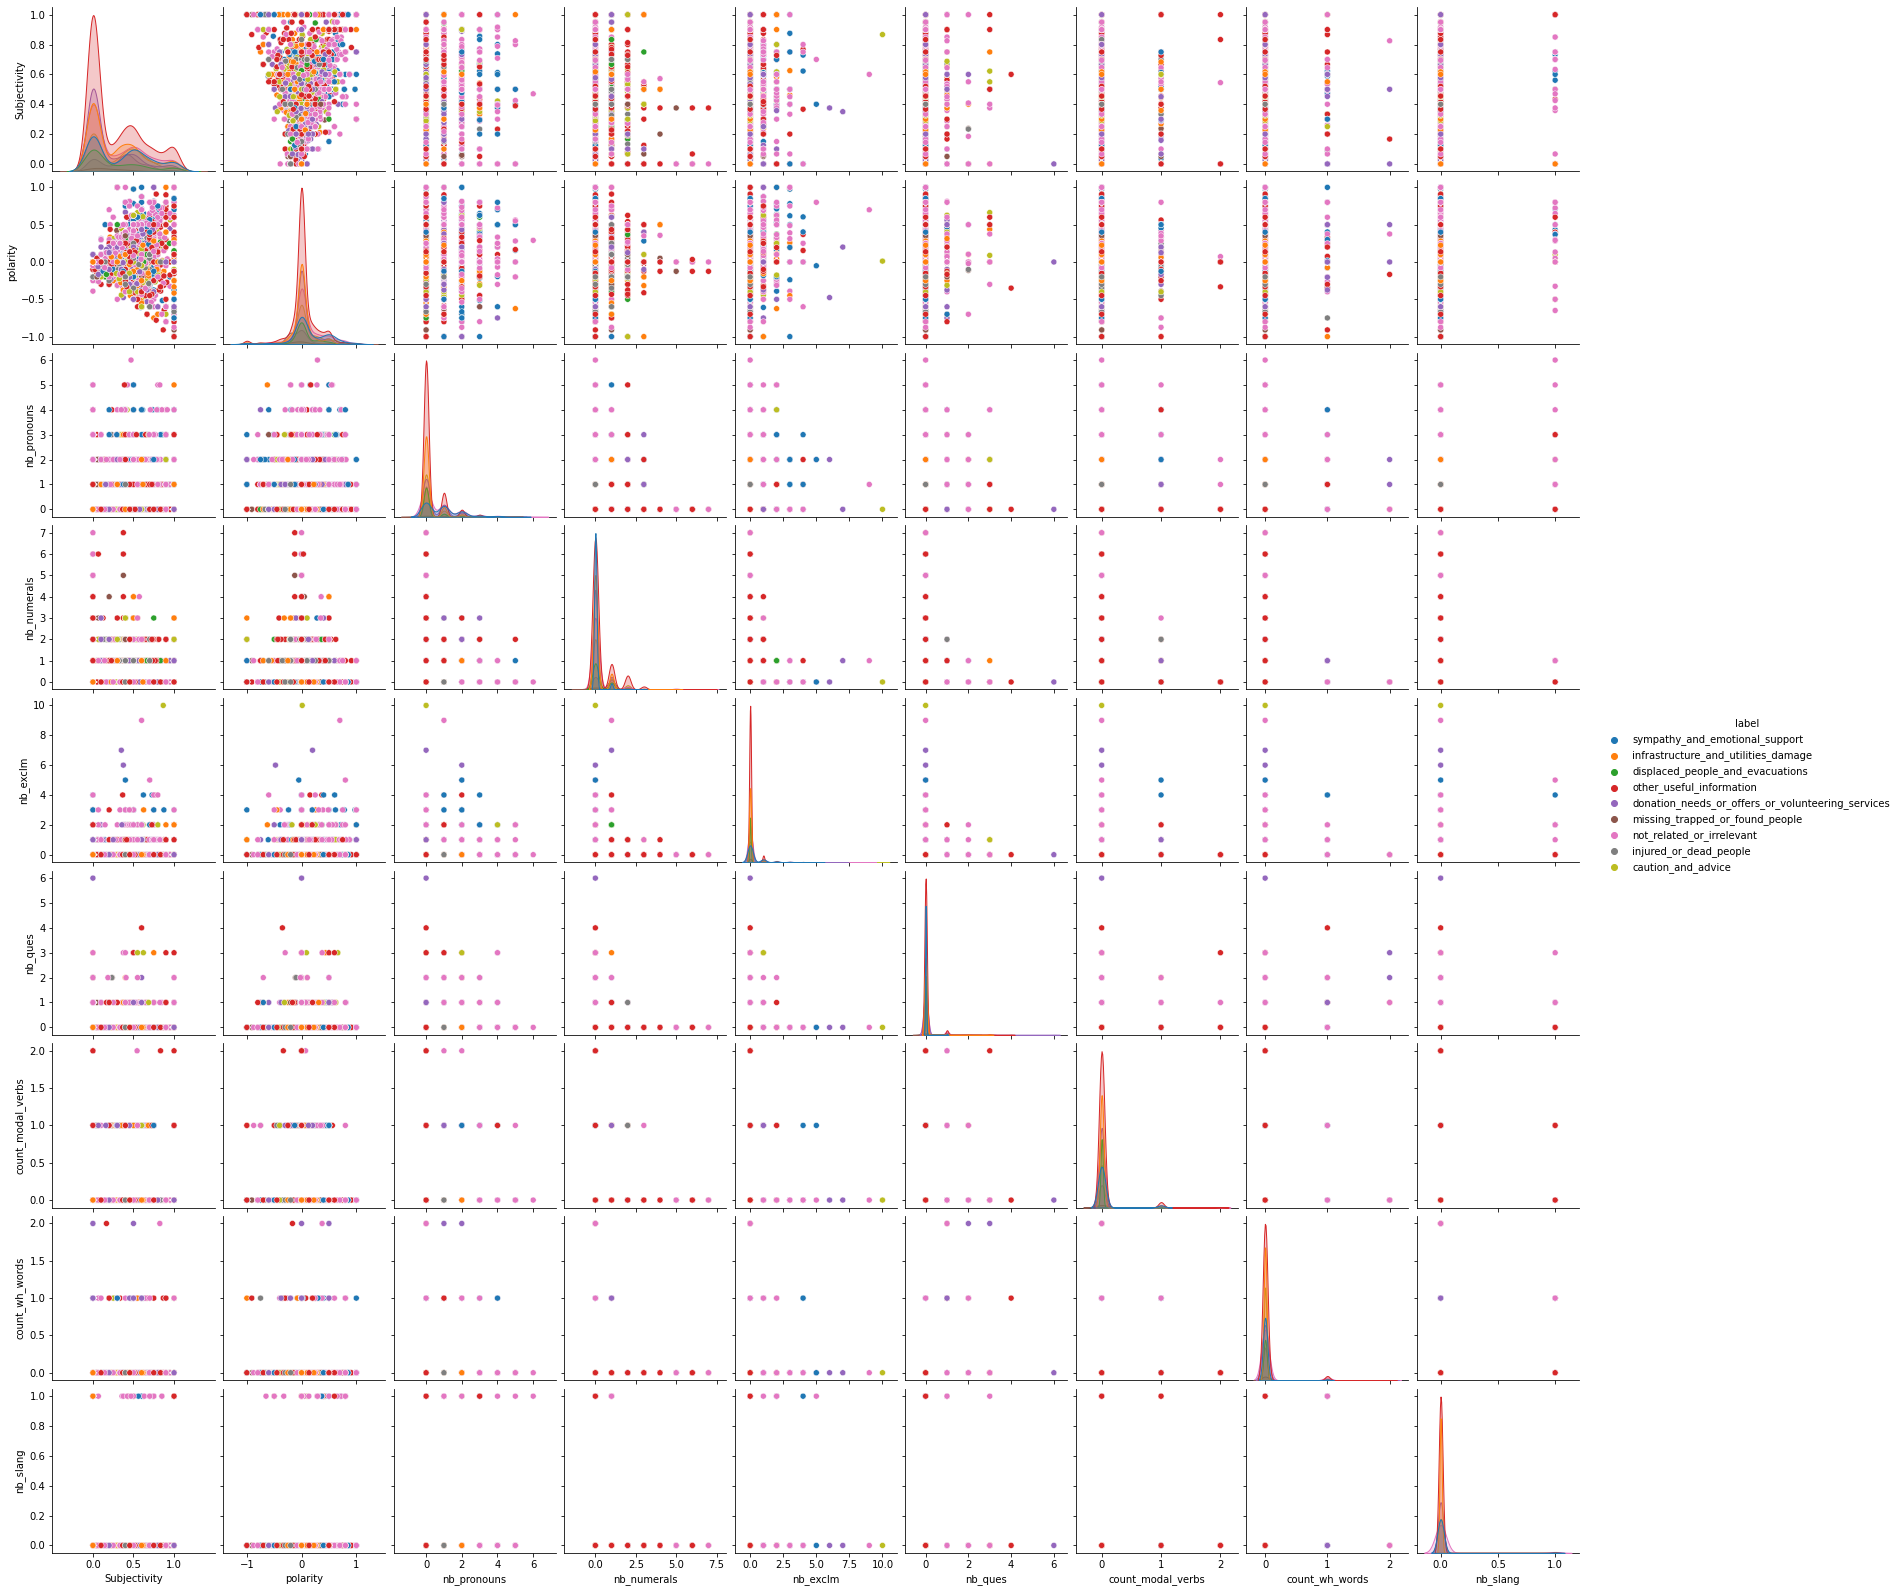

In [30]:
sns.pairplot(eq_df, hue='label', vars=['Subjectivity', 'polarity', 'nb_pronouns',
'nb_numerals', 'nb_exclm', 'nb_ques', 'count_modal_verbs',
'count_wh_words', 'nb_slang'])

In [31]:
svm_clf_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
X = eq_df.drop(['label', 'tweet_text', 'tokenized_text'], axis=1)
y = eq_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
svm_clf_rbf.fit(X_train, y_train)

rbf_pred = svm_clf_rbf.predict(X_test)

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  29.39
F1 (RBF Kernel):  17.53


In [32]:
svm_clf_poly = svm.SVC(kernel='poly', degree=0.5, C=1)
X = eq_df.drop(['label', 'tweet_text', 'tokenized_text'], axis=1)
y = eq_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)
svm_clf_poly.fit(X_train, y_train)

poly_pred = svm_clf_rbf.predict(X_test)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (POLY Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (POLY Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (POLY Kernel):  29.39
F1 (POLY Kernel):  17.53


In [33]:
rf_clf = RandomForestClassifier(max_depth=7, random_state=0)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy*100))
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))

Accuracy (Random Forest):  32.84
F1 (Random Forest):  24.99


In [34]:
tokens = [nltk.word_tokenize(tweet) for tweet in eq_df['tweet_text'].values]

In [35]:
tokens

[['Prayers',
  'for',
  'Cabo',
  ':',
  'Hurricane',
  'Odile',
  'Roars',
  'Through',
  'Cabo',
  'San',
  'Lucas',
  'http',
  ':',
  '//t.co/y0WuS1KXlj',
  'via',
  '@',
  'BloombergTV'],
 ['Sammy',
  'Hagar',
  "'s",
  'Home',
  'Damaged',
  'in',
  'Hurricane',
  ':',
  'Sammy',
  'Hagar',
  "'s",
  'home',
  'was',
  'damaged',
  'as',
  'Hurricane',
  'Odile',
  'slammed',
  'into',
  'Cabo',
  'S',
  '...',
  'http',
  ':',
  '//t.co/kaKbfZwAd9'],
 ['Residents',
  'Tourists',
  'Sent',
  'to',
  'Shelters',
  'as',
  'Hurricane',
  'Odile',
  'Makes',
  'Landfall',
  '–',
  'ABC',
  'News',
  'http',
  ':',
  '//t.co/O0tNjheiyb',
  '#',
  'happening',
  '#',
  'now',
  '#',
  'check',
  '#',
  'out',
  '#',
  'news'],
 ['Our',
  'thoughts',
  'go',
  'out',
  'to',
  'all',
  'of',
  'our',
  'friends',
  'in',
  'Los',
  'Cabos',
  'and',
  'Baja',
  'Mexico',
  'after',
  'being',
  'hit',
  'by',
  'Hurricane',
  '#',
  'Odile',
  '.',
  'Be',
  'safe',
  'everyone',
  '.'

In [36]:
model = word2vec.Word2Vec(size=32, min_count=1, workers=4)

##### model.build_vocab(tokens)

In [38]:
model.train(tokens, total_examples=len(tokens), epochs=4000)

(330074183, 461996000)

In [39]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list])

In [40]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(eq_df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['tweet_text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['tweet_text']), axis=1).values

X_train_word_average = word_averaging_list(model.wv,train_tokenized)
X_test_word_average = word_averaging_list(model.wv,test_tokenized)

<ipython-input-39-7024ffee7301>:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  mean.append(wv.syn0[wv.vocab[word].index])


In [41]:
logreg = LogisticRegression(n_jobs=1, C=1e5, solver='saga')
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred))

accuracy 0.591282375236892
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.48      0.25      0.33       135
                 displaced_people_and_evacuations       0.54      0.47      0.50        80
donation_needs_or_offers_or_volunteering_services       0.61      0.73      0.66       200
              infrastructure_and_utilities_damage       0.65      0.63      0.64       242
                           injured_or_dead_people       0.72      0.62      0.67        79
                  missing_trapped_or_found_people       0.00      0.00      0.00        20
                        not_related_or_irrelevant       0.65      0.69      0.67       222
                         other_useful_information       0.54      0.61      0.57       466
                   sympathy_and_emotional_support       0.61      0.59      0.60       139

                                         accuracy            

/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [42]:
classifier = MLPClassifier(alpha = 0.7, max_iter=400) 
classifier.fit(X_train_word_average, train['label'])
 
df_results = pd.DataFrame(data=np.zeros(shape=(1,3)), columns = ['classifier', 'train_score', 'test_score'] )
train_score = classifier.score(X_train_word_average, train['label'])
test_score = classifier.score(X_test_word_average, test['label'])
 
#print(classifier.predict_proba(X_test_word_average))
#print(classifier.predict(X_test_word_average))
 
df_results.loc[1,'classifier'] = "MLP"
df_results.loc[1,'train_score'] = train_score
df_results.loc[1,'test_score'] = test_score
print(df_results)

  classifier  train_score  test_score
0          0     0.000000    0.000000
1        MLP     0.618467    0.597599


In [43]:
eq_df.to_csv('for_bert_eq_data_hur.csv')